In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
import plotly.io as pio
pio.renderers.default = 'notebook'

In [3]:
df = pd.read_csv("Weather Data (2).csv")
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [4]:
df.shape

(8784, 8)

In [5]:
df.index

RangeIndex(start=0, stop=8784, step=1)

In [6]:
df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [7]:
df.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [8]:
df.nunique()

Date/Time           8784
Temp_C               533
Dew Point Temp_C     489
Rel Hum_%             83
Wind Speed_km/h       34
Visibility_km         24
Press_kPa            518
Weather               50
dtype: int64

In [9]:
df.count()

Date/Time           8784
Temp_C              8784
Dew Point Temp_C    8784
Rel Hum_%           8784
Wind Speed_km/h     8784
Visibility_km       8784
Press_kPa           8784
Weather             8784
dtype: int64

In [10]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df.set_index('Date/Time', inplace=True)


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2012-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Temp_C            8784 non-null   float64
 1   Dew Point Temp_C  8784 non-null   float64
 2   Rel Hum_%         8784 non-null   int64  
 3   Wind Speed_km/h   8784 non-null   int64  
 4   Visibility_km     8784 non-null   float64
 5   Press_kPa         8784 non-null   float64
 6   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(1)
memory usage: 549.0+ KB
None


In [12]:
df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [13]:
df[df.Weather == 'Clear']

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
Date/Time,,,,,,,
2012-01-03 19:00:00,-16.9,-24.8,50,24,25.0,101.74,Clear
2012-01-05 18:00:00,-7.1,-14.4,56,11,25.0,100.71,Clear
2012-01-05 19:00:00,-9.2,-15.4,61,7,25.0,100.80,Clear
2012-01-05 20:00:00,-9.8,-15.7,62,9,25.0,100.83,Clear
2012-01-05 21:00:00,-9.0,-14.8,63,13,25.0,100.83,Clear
...,...,...,...,...,...,...,...
2012-12-26 06:00:00,-13.4,-14.8,89,4,25.0,102.47,Clear
2012-12-28 10:00:00,-6.1,-8.6,82,19,24.1,101.27,Clear
2012-12-29 01:00:00,-11.9,-13.6,87,11,25.0,101.31,Clear


In [14]:
df.isnull().sum()

Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.groupby('Weather').get_group('Clear')

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
Date/Time,,,,,,,
2012-01-03 19:00:00,-16.9,-24.8,50,24,25.0,101.74,Clear
2012-01-05 18:00:00,-7.1,-14.4,56,11,25.0,100.71,Clear
2012-01-05 19:00:00,-9.2,-15.4,61,7,25.0,100.80,Clear
2012-01-05 20:00:00,-9.8,-15.7,62,9,25.0,100.83,Clear
2012-01-05 21:00:00,-9.0,-14.8,63,13,25.0,100.83,Clear
...,...,...,...,...,...,...,...
2012-12-26 06:00:00,-13.4,-14.8,89,4,25.0,102.47,Clear
2012-12-28 10:00:00,-6.1,-8.6,82,19,24.1,101.27,Clear
2012-12-29 01:00:00,-11.9,-13.6,87,11,25.0,101.31,Clear


In [17]:
df.groupby("Wind Speed_km/h").get_group(4).count()

Temp_C              474
Dew Point Temp_C    474
Rel Hum_%           474
Wind Speed_km/h     474
Visibility_km       474
Press_kPa           474
Weather             474
dtype: int64

In [18]:
df.rename(columns = {'Weather': 'Weather condition'}, inplace = True)

In [19]:
df.head(3)

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather condition
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"


In [20]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temp_C,8784.0,8.798144,11.687883,-23.30,0.10,9.30,18.80,33.00
Dew Point Temp_C,8784.0,2.555294,10.883072,-28.50,-5.90,3.30,11.80,24.40
Rel Hum_%,8784.0,67.431694,16.918881,18.00,56.00,68.00,81.00,100.00
Wind Speed_km/h,8784.0,14.945469,8.688696,0.00,9.00,13.00,20.00,83.00
Visibility_km,8784.0,27.664447,12.622688,0.20,24.10,25.00,25.00,48.30
Press_kPa,8784.0,101.051623,0.844005,97.52,100.56,101.07,101.59,103.65


In [21]:
df.rename(columns = {'Rel Hum_%': 'Humidity'}, inplace = True)

In [22]:
df.groupby('Weather condition').mean()

,Temp_C,Dew Point Temp_C,Humidity,Wind Speed_km/h,Visibility_km,Press_kPa
Weather condition,,,,,,
Clear,6.825716,0.089367,64.497738,10.557315,30.153243,101.587443
Cloudy,7.970544,2.375810,69.592593,16.127315,26.625752,100.911441
Drizzle,7.353659,5.504878,88.243902,16.097561,17.931707,100.435366
"Drizzle,Fog",8.067500,7.033750,93.275000,11.862500,5.257500,100.786625
"Drizzle,Ice Pellets,Fog",0.400000,-0.700000,92.000000,20.000000,4.000000,100.790000
"Drizzle,Snow",1.050000,0.150000,93.500000,14.000000,10.500000,100.890000
"Drizzle,Snow,Fog",0.693333,0.120000,95.866667,15.533333,5.513333,99.281333
Fog,4.303333,3.159333,92.286667,7.946667,6.248000,101.184067
Freezing Drizzle,-5.657143,-8.000000,83.571429,16.571429,9.200000,100.202857


# DATA VISUALIZATION :

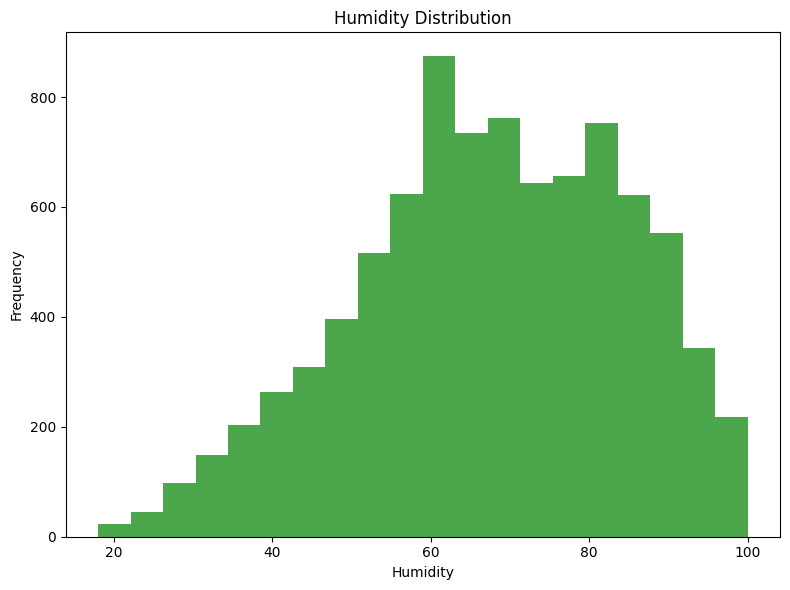

In [23]:

plt.figure(figsize=(8, 6))
plt.hist(df['Humidity'], bins=20, color='green', alpha=0.7)
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.title('Humidity Distribution')
plt.tight_layout()
plt.show()

## 1. Temperature Trend Over Time

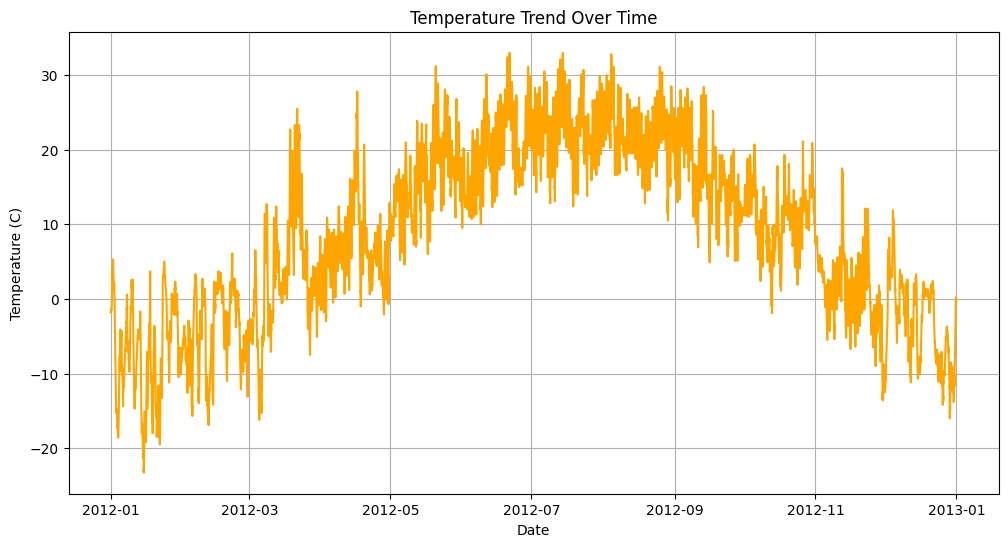

In [24]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Temp_C'], color='orange')
plt.title("Temperature Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (C)")
plt.grid(True)
plt.show()


##  2. Distribution of Temperature

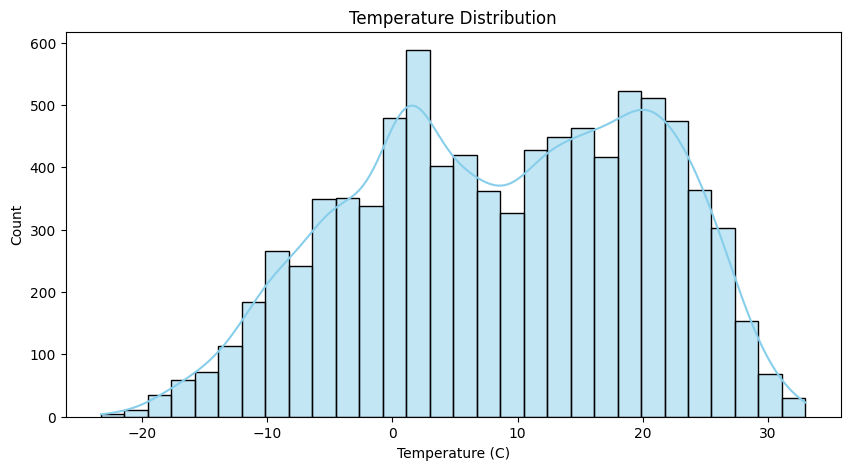

In [25]:
plt.figure(figsize=(10,5))
sns.histplot(df['Temp_C'], bins=30, kde=True, color='skyblue')
plt.title("Temperature Distribution")
plt.xlabel("Temperature (C)")
plt.ylabel("Count")
plt.show()


## 3. Correlation Heatmap

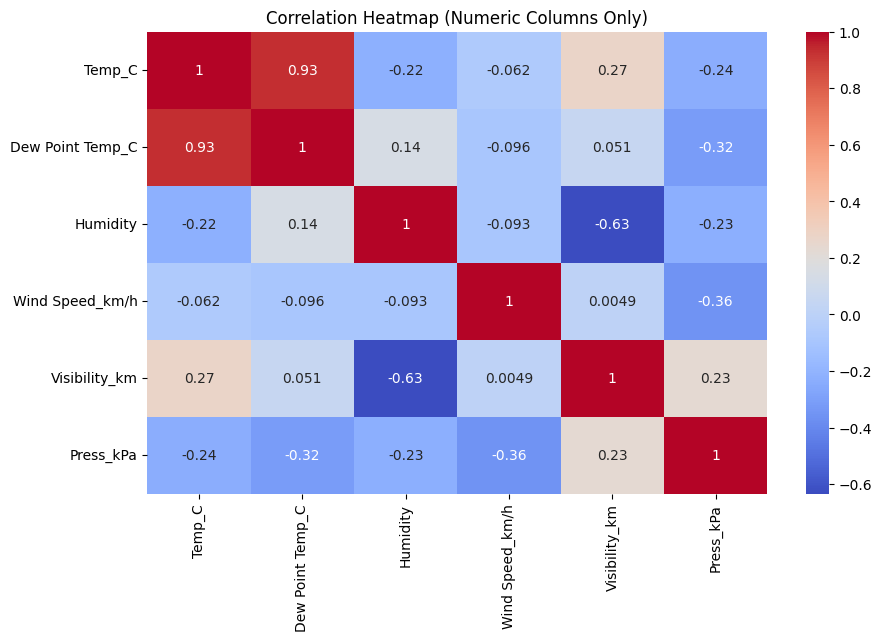

In [26]:
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()


## 4. Boxplot (Temperature vs Weather Condition)

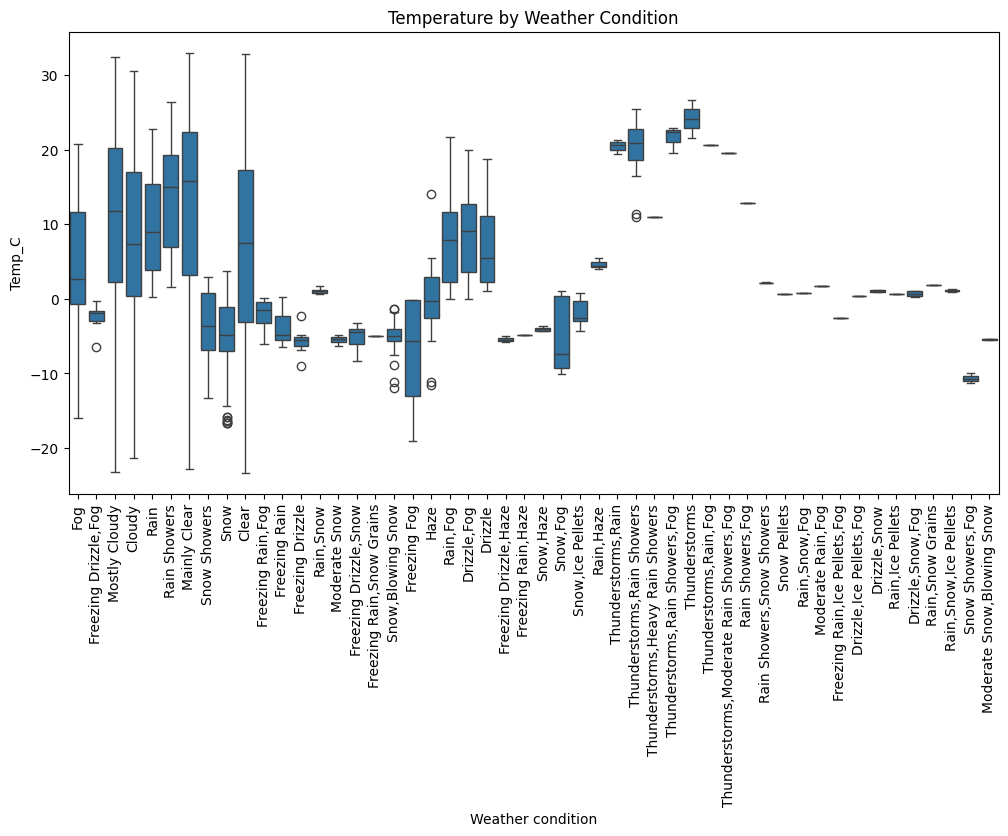

In [27]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Weather condition', y='Temp_C', data=df.reset_index())
plt.xticks(rotation=90)
plt.title("Temperature by Weather Condition")
plt.show()


In [28]:
df.head()

,Temp_C,Dew Point Temp_C,Humidity,Wind Speed_km/h,Visibility_km,Press_kPa,Weather condition
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [29]:
df = df[df['Wind Speed_km/h'].notnull()]

In [30]:
df['WindSpeedCategory'] = pd.cut(
    df["Wind Speed_km/h"],
    bins=[0, 13, 25, float("inf")],
    labels=['Low', 'Medium', 'High']
)

In [31]:
df = df[df['WindSpeedCategory'].notnull()]

In [32]:
category_map = {'Low': 0, 'Medium': 1, 'High': 2}
df['WindSpeedCategory'] = df['WindSpeedCategory'].map(category_map)

## 5. Time Series Decomposition (Trend + Seasonality)

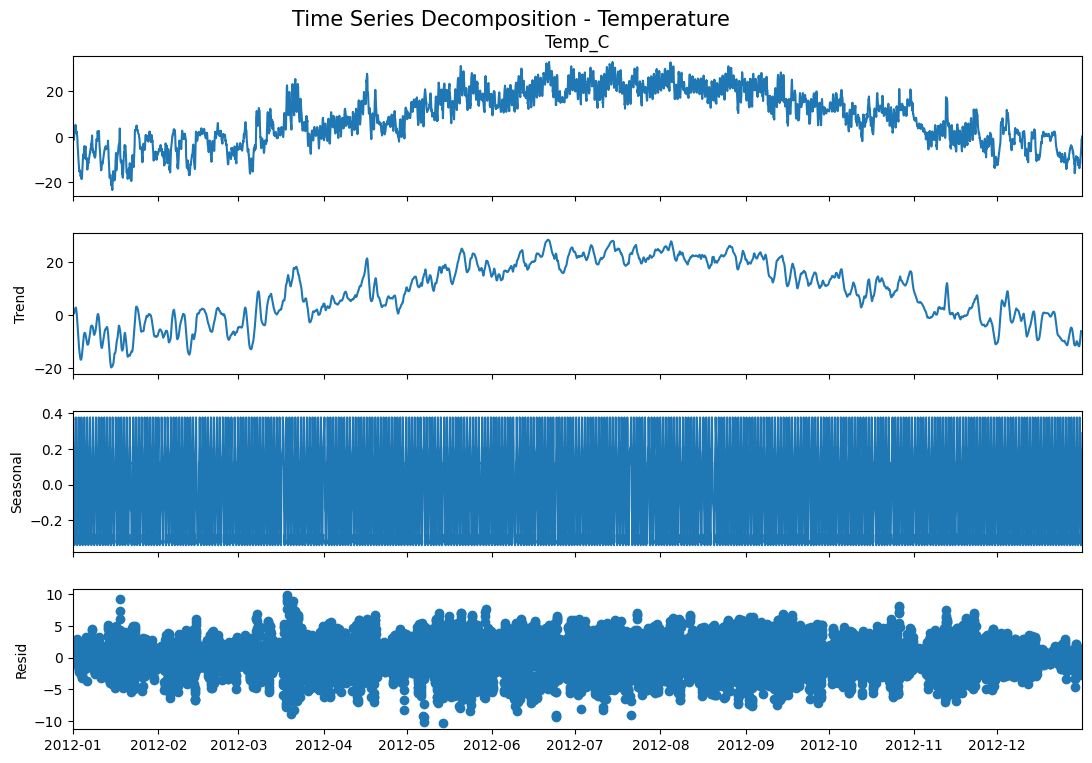

In [35]:
result = seasonal_decompose(df['Temp_C'], model='additive', period=24)
fig = result.plot()
fig.set_size_inches(12, 8) 
plt.suptitle("Time Series Decomposition - Temperature", fontsize=15)
plt.show()


## 6. Interactive Dashboard (Temp, Humidity, Wind)


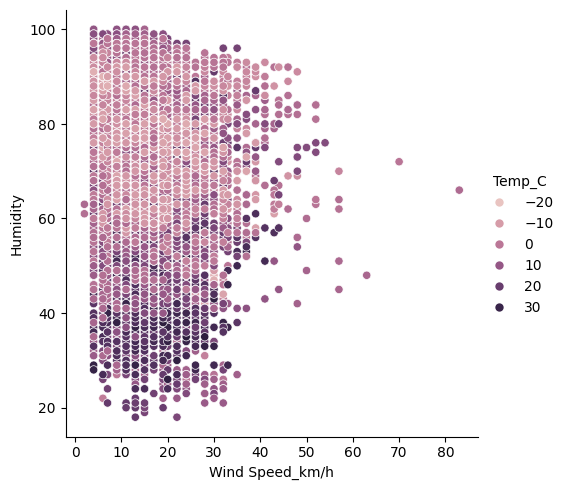

In [ ]:
sns.relplot(data=df, y='Humidity', x='Wind Speed_km/h', kind='scatter',hue='Temp_C', color='orange' ,label='Temperature')
plt.show()

 ## 7. Pairplot (Correlation Between Features)

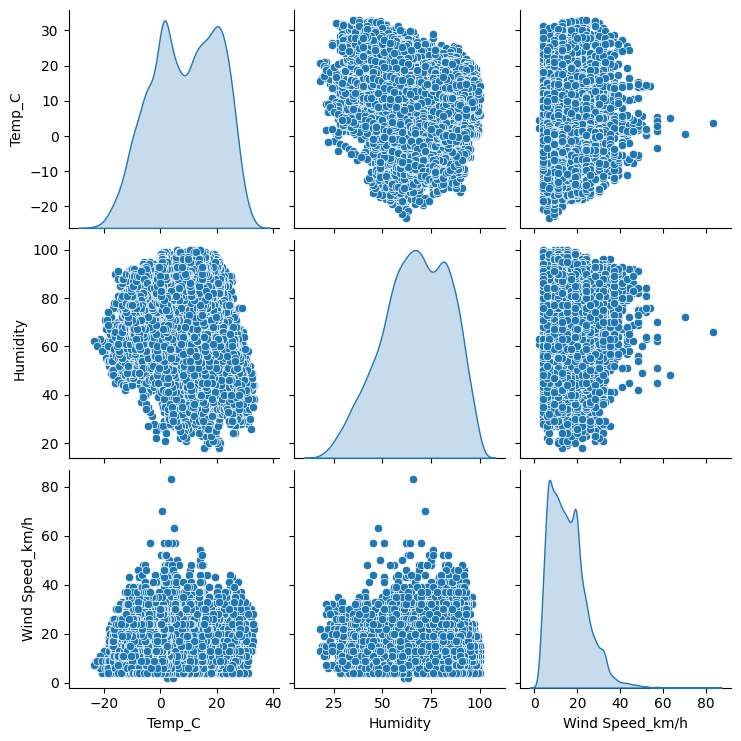

In [ ]:
sns.pairplot(df[['Temp_C', 'Humidity', 'Wind Speed_km/h']], diag_kind='kde')
plt.show()
